In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"./data/clustered_data.csv")
# Print shape of dataset
print(df.shape)

(2240, 22)


In [2]:
# Get cluster-wise summary statistics
cluster_summary = df.groupby("cluster").mean()
print(cluster_summary)


               Age  Education  Marital Status  Parental Status  Children  \
cluster                                                                    
0        54.443258   2.480641        0.659546         0.690254  1.016021   
1        56.331967   2.569672        0.622951         0.938525  1.004098   
2        49.400631   2.291798        0.660883         0.963722  1.299685   
3        53.859838   2.522911        0.595687         0.010782  0.010782   
4        54.652893   2.632231        0.652893         0.995868  1.219008   

               Income  Total_Spending  Days_as_Customer    Recency  \
cluster                                                              
0        52899.425567      636.058578       4238.118825  48.288385   
1        64725.438525      955.770492       4256.680328  50.463115   
2        32612.361987       58.769716       4168.507886  48.288644   
3        76611.621294     1387.778976       4200.145553  50.970350   
4        48205.509298      393.404959       425

In [3]:
print(df['cluster'].value_counts())

cluster
0    749
2    634
3    371
1    244
4    242
Name: count, dtype: int64


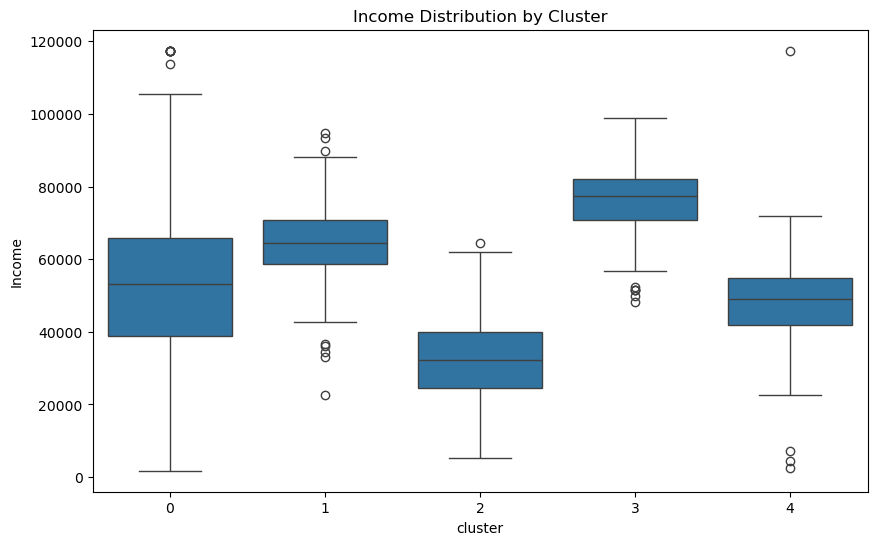

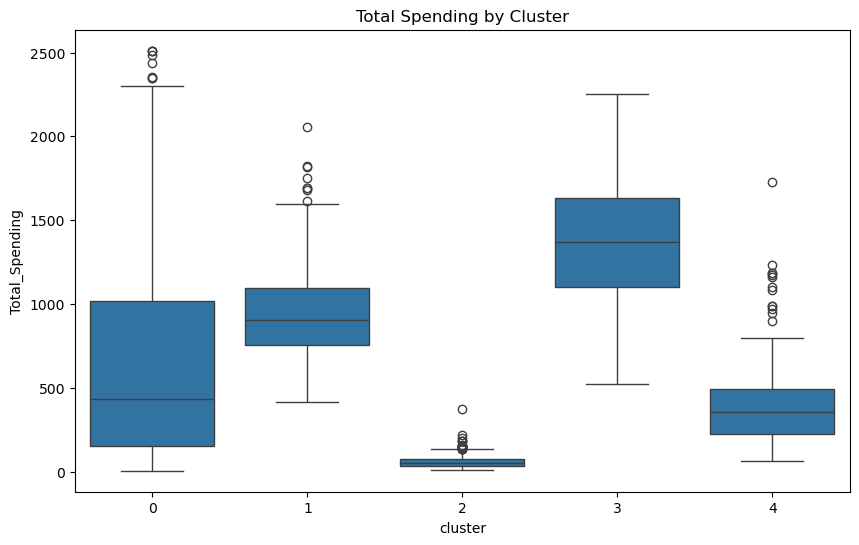

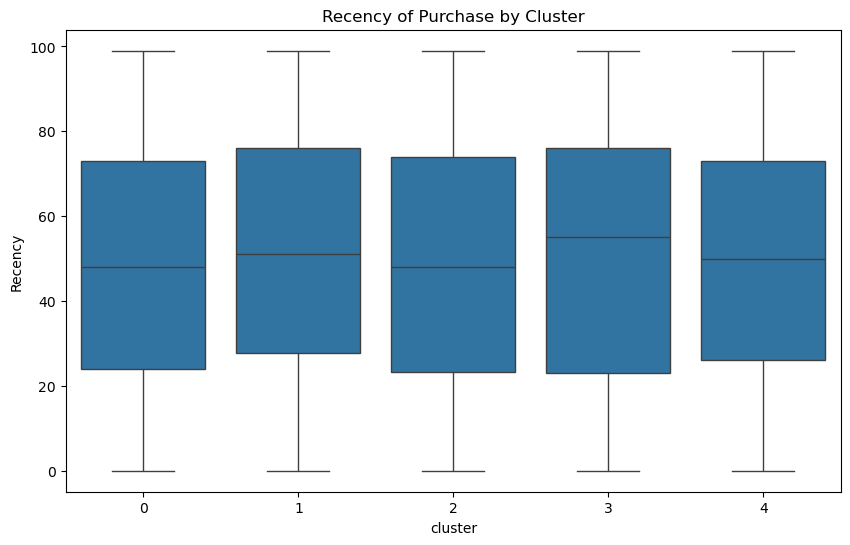

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Income distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Income', data=df)
plt.title('Income Distribution by Cluster')
plt.show()

# Total Spending by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Total_Spending', data=df)
plt.title('Total Spending by Cluster')
plt.show()

# Recency by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Recency', data=df)
plt.title('Recency of Purchase by Cluster')
plt.show()

# Customer Segmentation Analysis

## Cluster Characteristics and Possible Labels

| Cluster | Characteristics | Possible Label |
|---------|----------------|---------------|
| **0 (Largest Group - 749 customers)** | Middle-aged (54), moderate income (52K), moderate spending (636), prefers store purchases (6.1), average online activity, buys wine & meat, uses discounts moderately. | **Balanced Shoppers** – Customers with steady spending on diverse products. |
| **1 (244 customers)** | Higher income (64K), high spending (955), buys a lot of wine, meat, and luxury items (gold), high online/catalog activity, least discount usage. | **Affluent Shoppers** – High-income, premium buyers. |
| **2 (634 customers)** | Lower income (32K), extremely low spending (58), least purchases overall, least online/catalog activity. | **Low-Spending Customers** – Budget-conscious or disengaged shoppers. |
| **3 (371 customers)** | Highest income (76K), highest spending (1387), buys most wine, meat, fish, and sweets, high catalog activity, least web visits. | **Luxury Enthusiasts** – Wealthy customers who shop high-end and prefer catalogs over online. |
| **4 (242 customers)** | Middle-income (48K), low spending (393), higher discount usage, more web visits, moderate wine & meat purchases. | **Discount Seekers** – Value-driven shoppers who buy on deals. |

## Observations:

- **Cluster 3 (Luxury Enthusiasts)** are the wealthiest and biggest spenders.
- **Cluster 2 (Low-Spending Customers)** might be inactive or low-income customers.
- **Cluster 1 (Affluent Shoppers)** have high income and high spending, but they’re still behind Cluster 3 in spending.
- **Cluster 4 (Discount Seekers)** rely more on discounts and online activity.
- **Cluster 0 (Balanced Shoppers)** represents the average customer profile.
